In [1]:
"""Devise an experiment that compares the performance of the del operator on lists and
dictionaries. What we're trying to show is that for lists deleting will be O(n) and
for dictionaries del will be O(1)"""

from timeit import timeit

dictionaries, del_dict_times = {}, {}
lists, del_list_times = {}, {}
sizes = range(1_000, 100_000, 1_000)
for size in sizes:
    lists[size] = list(range(size))
    dictionaries[size] = dict(zip(lists[size], lists[size]))
    del_dict_times[size] = timeit(
        f"del dictionaries[{size}][0]", "from __main__ import dictionaries", number=1
    )
    del_list_times[size] = timeit(
        f"del lists[{size}][0]", "from __main__ import lists", number=1
    )


In [2]:
import pandas as pd

df = pd.DataFrame({"size": sizes, "dict_times": list(del_dict_times.values()),"list_times": list(del_list_times.values())})
df

,size,dict_times,list_times
0,1000,9.780000e-07,0.000001
1,2000,8.510000e-07,0.000001
2,3000,9.340000e-07,0.000002
3,4000,8.790000e-07,0.000002
4,5000,8.440000e-07,0.000002
...,...,...,...
94,95000,1.128000e-06,0.000049
95,96000,1.041000e-06,0.000049
96,97000,1.163000e-06,0.000050
97,98000,1.016000e-06,0.000050


Line graph: 


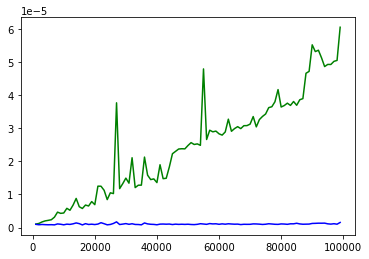

In [3]:
import matplotlib.pyplot as plt

# plotting a line graph
print("Line graph: ")
plt.plot(df["size"], df["list_times"], 'g')
plt.plot(df["size"], df["dict_times"], 'b')
plt.show()